In [4]:
%matplotlib inline
from geopy.geocoders import Nominatim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [12]:
df = pd.read_csv(r"excel_files/top_grossing_by_year1980.csv", header = None)
df_2018 = pd.read_csv(r"excel_files/top_grossing_by_year2018.csv", header = None)

In [13]:
geolocator = Nominatim(user_agent='myapplication')
location = geolocator.geocode(df[3][3])

In [14]:
df_2018 = df_2018.drop([0,4,5,6,7,8], axis = 1)

In [15]:
df_2018.columns = ["Title", "Setting", "Country"]

In [16]:
df = df.drop(0, axis=1)

In [17]:
df.columns = {"Title", "Setting", "Country", "Period"}

In [18]:
df.head()

Setting                              Title        Country  \
0  The Empire Strikes Back                              Space            NaN   
1                   9 to 5  800 W 6th Street, Los Angeles, CA  United States   
2               Stir Crazy          Prison, Florence, Arizona  United States   
3                Airplane!               Los Angeles, Chicago  United States   
4    Any Which Way You Can                                NaN            NaN   

  Period  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [19]:
lat = pd.Series()
long = pd.Series()

In [30]:
geolocator = Nominatim(user_agent='myapplication')
location = geolocator.geocode("Los Angeles")
location[1][1]

-118.2427666

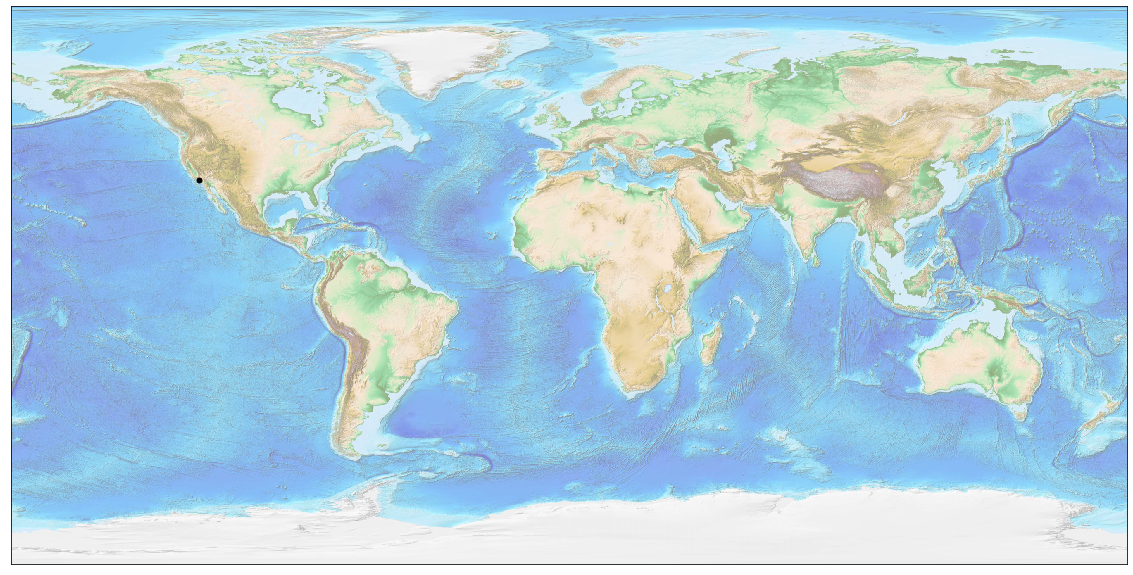

In [32]:
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='cyl', resolution=None, 
            lat_0=1, lon_0=1,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
#x, y = m(-87, 41)
x, y = m(location[1][1], location[1][0])
plt.plot(x, y, 'ok', markersize=5)
#plt.text(x, y, ' Chicago', fontsize=12);

(-31.9527121, 115.8604796)

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [24]:
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

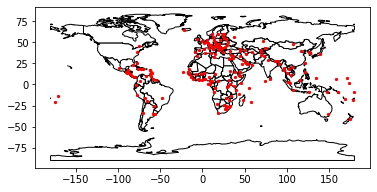

In [25]:
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5)

In [26]:
new_df.head()

NameError: name 'new_df' is not defined

In [42]:
new_df = df.groupby(['Country']).count()
new_df = new_df.reset_index()
new_df = world.merge(new_df,how='left', left_on='name', right_on='Country').drop(["Country", "Period", "Title"], axis = 1)

In [43]:
new_df

pop_est                continent                    name iso_a3  \
0     28400000.0                     Asia             Afghanistan    AFG   
1     12799293.0                   Africa                  Angola    AGO   
2      3639453.0                   Europe                 Albania    ALB   
3      4798491.0                     Asia    United Arab Emirates    ARE   
4     40913584.0            South America               Argentina    ARG   
5      2967004.0                     Asia                 Armenia    ARM   
6         3802.0               Antarctica              Antarctica    ATA   
7          140.0  Seven seas (open ocean)  Fr. S. Antarctic Lands    ATF   
8     21262641.0                  Oceania               Australia    AUS   
9      8210281.0                   Europe                 Austria    AUT   
10     8238672.0                     Asia              Azerbaijan    AZE   
11     8988091.0                   Africa                 Burundi    BDI   
12    10414336.0                   Europe                 Belgium    BEL   
13     8791832.0                   Africa                   Benin    BEN   
14    15746232.0                   Africa            Burkina Faso    BFA   
15   156050883.0                     Asia              Bangladesh    BGD   
16     7204687.0                   Europe                Bulgaria    BGR   
17      309156.0            North America                 Bahamas    BHS   
18     4613414.0                   Europe        Bosnia and Herz.    BIH   
19     9648533.0                   Europe                 Belarus    BLR   
20      307899.0            North America                  Belize    BLZ   
21     9775246.0            South America                 Bolivia    BOL   
22   198739269.0            South America                  Brazil    BRA   
23      388190.0                     Asia                  Brunei    BRN   
24      691141.0                     Asia                  Bhutan    BTN   
25     1990876.0                   Africa                Botswana    BWA   
26     4511488.0                   Africa    Central African Rep.    CAF   
27    33487208.0            North America                  Canada    CAN   
28     7604467.0                   Europe             Switzerland    CHE   
29    16601707.0            South America                   Chile    CHL   
..           ...                      ...                     ...    ...   
147    7379339.0                   Europe                  Serbia    SRB   
148     481267.0            South America                Suriname    SUR   
149    5463046.0                   Europe                Slovakia    SVK   
150    2005692.0                   Europe                Slovenia    SVN   
151    9059651.0                   Europe                  Sweden    SWE   
152    1123913.0                   Africa               Swaziland    SWZ   
153   20178485.0                     Asia                   Syria    SYR   
154   10329208.0                   Africa                    Chad    TCD   
155    6019877.0                   Africa                    Togo    TGO   
156   65905410.0                     Asia                Thailand    THA   
157    7349145.0                     Asia              Tajikistan    TJK   
158    4884887.0                     Asia            Turkmenistan    TKM   
159    1131612.0                     Asia             Timor-Leste    TLS   
160    1310000.0            North America     Trinidad and Tobago    TTO   
161   10486339.0                   Africa                 Tunisia    TUN   
162   76805524.0                     Asia                  Turkey    TUR   
163   22974347.0                     Asia                  Taiwan    TWN   
164   41048532.0                   Africa                Tanzania    TZA   
165   32369558.0                   Africa                  Uganda    UGA   
166   45700395.0                   Europe                 Ukraine    UKR   
167    3494382.0            South America                

In [66]:
map_2018 = df_2018.groupby(["Country"]).count()
map_2018 = map_2018.reset_index()
map_2018 = world.merge(map_2018,how='left', left_on='name', right_on='Country').drop(["Country", "Title"], axis = 1).fillna(0)

In [67]:
map_2018["Setting"][168]

53.0

In [44]:
new_df=new_df.fillna(0)

In [57]:
new_df["Period"] = (np.e**(new_df["Setting"]))

In [58]:
new_df.head()

pop_est      continent                  name iso_a3  gdp_md_est  \
0  28400000.0           Asia           Afghanistan    AFG     22270.0   
1  12799293.0         Africa                Angola    AGO    110300.0   
2   3639453.0         Europe               Albania    ALB     21810.0   
3   4798491.0           Asia  United Arab Emirates    ARE    184300.0   
4  40913584.0  South America             Argentina    ARG    573900.0   

                                            geometry  Setting  Period  
0  POLYGON ((61.21081709172574 35.65007233330923,...      0.0     1.0  
1  (POLYGON ((16.32652835456705 -5.87747039146621...      0.0     1.0  
2  POLYGON ((20.59024743010491 41.85540416113361,...      0.0     1.0  
3  POLYGON ((51.57951867046327 24.24549713795111,...      0.0     1.0  
4  (POLYGON ((-65.50000000000003 -55.199999999999...      0.0     1.0

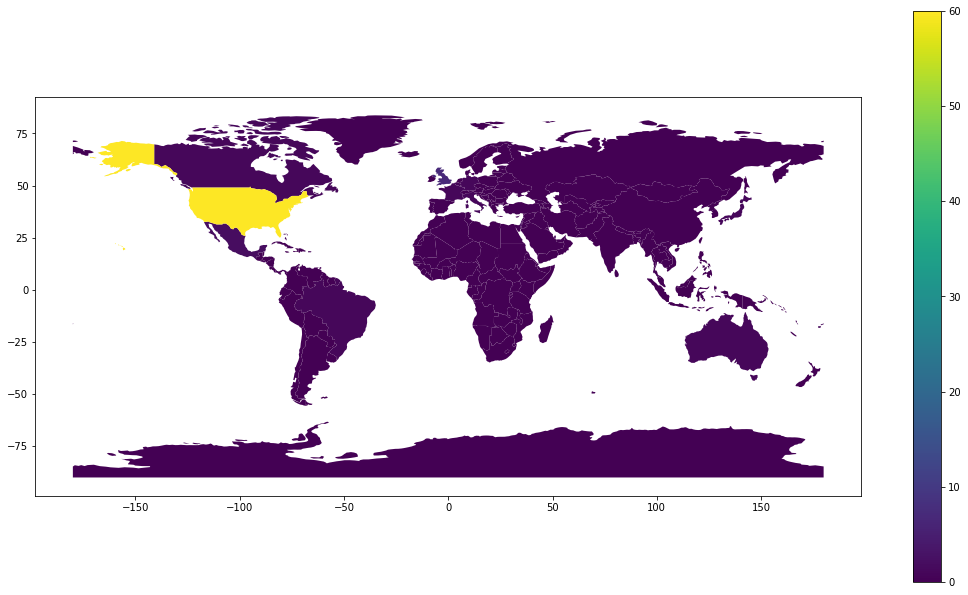

In [60]:
fig, ax = plt.subplots(1, 1)

new_df.plot(column='Setting',
            ax=ax,
            legend=True,
            legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})
fig.set_size_inches(18.5, 10.5, forward=True)

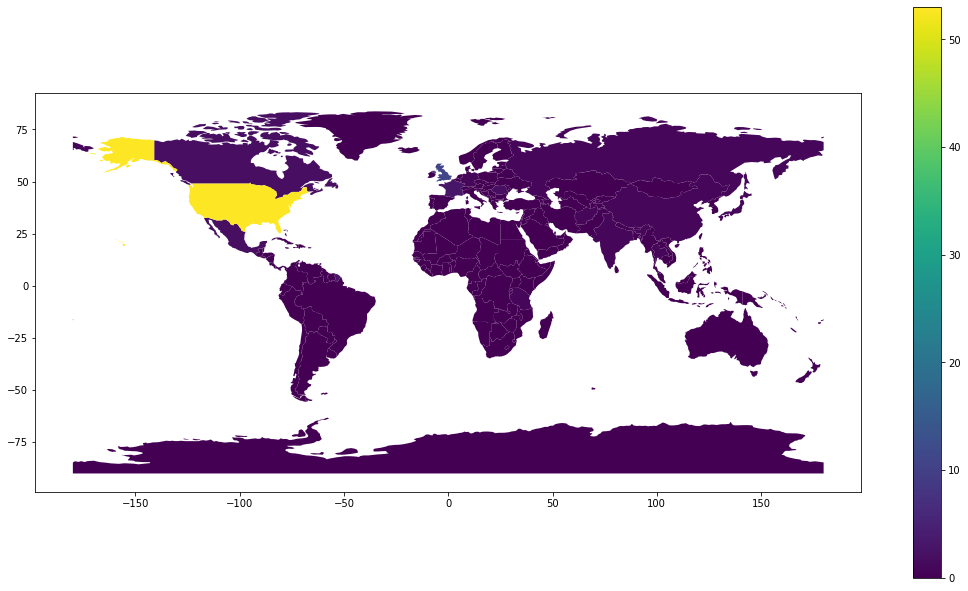

In [68]:
fig, ax = plt.subplots(1, 1)

map_2018.plot(column='Setting',
            ax=ax,
            legend=True,
            legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})
fig.set_size_inches(18.5, 10.5, forward=True)

In [1]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()